In [14]:
# Import Libraries

# Data Management
import pandas as pd
import numpy as np

# Plots
import matplotlib.pyplot as plt

# Handle Files
import sys
import os

# Import Local Functions
sys.path.append(os.path.abspath("../source"))
from config import get_tickers
from data_downloader import get_market_data
from markowitz_portfolios_toolkit import markowitz_weights

### Building a Portfolio ###

In [15]:
stocks_tickers = get_tickers("6.1a")

stocks_tickers

['AAPL', 'JNJ', 'JPM', 'AMZN', 'XOM', 'UNP', 'PLD']

In [16]:
sectors_tickers = get_tickers("6.1b")

sectors_tickers

['XLK', 'XLV', 'XLF', 'XLY', 'XLE', 'XLI', 'XLRE']

In [17]:
# DataFrame to store everything
stock_returns_df = pd.DataFrame()

for ticker in stocks_tickers:
    df_stock = get_market_data(
        ticker=ticker, 
        start_date='2020-01-01', 
        end_date='2026-01-01', 
        returns=True
    )
    
    returns = df_stock['returns'].rename(ticker)
    
    stock_returns_df = pd.concat([stock_returns_df, returns], axis=1)

In [18]:
stock_returns_df

,AAPL,JNJ,JPM,AMZN,XOM,UNP,PLD
2020-01-03 00:00:00,-0.009770,-0.011645,-0.013284,-0.012213,-0.008072,-0.007103,0.011137
2020-01-06 00:00:00,0.007937,-0.001248,-0.000796,0.014776,0.007649,-0.008601,-0.003923
2020-01-07 00:00:00,-0.004714,0.006088,-0.017147,0.002089,-0.008217,-0.007608,-0.006422
2020-01-08 00:00:00,0.015958,-0.000138,0.007771,-0.007839,-0.015195,0.010891,0.005411
2020-01-09 00:00:00,0.021019,0.002962,0.003644,0.004788,0.007627,-0.005124,0.000112
...,...,...,...,...,...,...,...
2025-07-30 00:00:00,-0.010563,-0.005069,0.008682,-0.003556,-0.008720,0.006725,-0.011274
2025-07-31 00:00:00,-0.007105,-0.015181,-0.011378,0.016886,-0.002326,-0.014802,-0.015887
2025-08-01 00:00:00,-0.025322,0.015599,-0.023464,-0.086317,-0.018077,-0.011646,-0.017668
2025-08-04 00:00:00,0.004782,0.021929,0.016758,-0.014541,-0.020921,0.012051,0.002855


In [19]:
# Portfolio's Expected Returns
expected_returns = stock_returns_df.mean()
expected_returns.name = 'mean_returns'

expected_returns

AAPL    0.000732
JNJ     0.000222
JPM     0.000631
AMZN    0.000578
XOM     0.000480
UNP     0.000230
PLD     0.000243
Name: mean_returns, dtype: float64

In [20]:
# Covariance Matrix
covariance_matrix = stock_returns_df.cov()

covariance_matrix

,AAPL,JNJ,JPM,AMZN,XOM,UNP,PLD
AAPL,0.000415,0.000086,0.000179,0.000278,0.000133,0.000164,0.000219
JNJ,0.000086,0.000158,0.000095,0.000039,0.000077,0.000087,0.000112
JPM,0.000179,0.000095,0.000406,0.000140,0.000241,0.000221,0.000199
AMZN,0.000278,0.000039,0.000140,0.000516,0.000076,0.000118,0.000190
XOM,0.000133,0.000077,0.000241,0.000076,0.000450,0.000176,0.000136
UNP,0.000164,0.000087,0.000221,0.000118,0.000176,0.000299,0.000194
PLD,0.000219,0.000112,0.000199,0.000190,0.000136,0.000194,0.000400


In [21]:
# Correlation Matrix
correlation_matrix = stock_returns_df.corr()

correlation_matrix

,AAPL,JNJ,JPM,AMZN,XOM,UNP,PLD
AAPL,1.000000,0.335341,0.435342,0.602120,0.306838,0.467265,0.539282
JNJ,0.335341,1.000000,0.374479,0.137808,0.289936,0.401174,0.443712
JPM,0.435342,0.374479,1.000000,0.305370,0.562338,0.634374,0.492676
AMZN,0.602120,0.137808,0.305370,1.000000,0.156888,0.300176,0.418943
XOM,0.306838,0.289936,0.562338,0.156888,1.000000,0.480090,0.320691
UNP,0.467265,0.401174,0.634374,0.300176,0.480090,1.000000,0.560886
PLD,0.539282,0.443712,0.492676,0.418943,0.320691,0.560886,1.000000


In [22]:
# Obtain Weights
p_weights = markowitz_weights(
    expected_returns, 
    covariance_matrix,
    0.0010
)

In [23]:
# Create a Portfolio Weights DF
portfolio_weights = pd.Series(
    p_weights,
    index = stock_returns_df.columns,
    name = 'weights'
)

portfolio_weights

AAPL    0.790813
JNJ     0.212606
JPM     0.704044
AMZN    0.155564
XOM     0.175161
UNP    -0.589015
PLD    -0.449174
Name: weights, dtype: float64

In [24]:
# Portfolio Returns
portfolio_returns = stock_returns_df @ p_weights
portfolio_returns.name = 'portfolio_returns'

portfolio_returns

2020-01-03   -0.023687
2020-01-06    0.015918
2020-01-07   -0.008254
2020-01-08    0.005335
2020-01-09    0.024866
                ...   
2025-07-30   -0.004297
2025-07-31    0.001217
2025-08-01   -0.035026
2025-08-04    0.005934
2025-08-05   -0.017827
Name: portfolio_returns, Length: 1404, dtype: float64

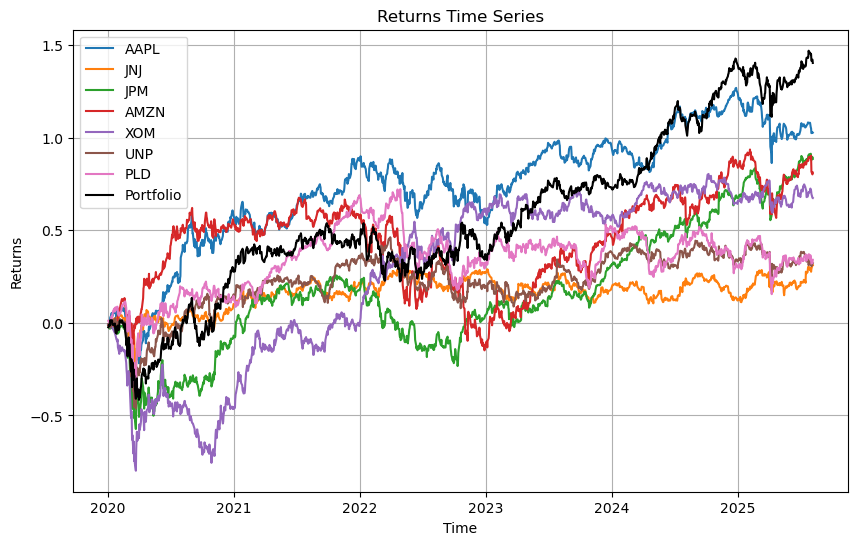

In [25]:
# Create Plot
plt.figure(figsize=(10, 6))
plt.plot(stock_returns_df.cumsum(), label=stock_returns_df.columns, alpha=1)
plt.plot(portfolio_returns.cumsum(), label='Portfolio', color='black', alpha=1)

# Config
plt.title('Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.grid()

# Show
plt.show() 

### Getting a Benchmark: Using a Hypothetical Portfolio ###

In [26]:
# DataFrame to store everything
sector_returns_df = pd.DataFrame()

for ticker in sectors_tickers:
    df_stock = get_market_data(
        ticker=ticker, 
        start_date='2020-01-01', 
        end_date='2026-01-01', 
        returns=True
    )
    
    returns = df_stock['returns'].rename(ticker)
    
    sector_returns_df = pd.concat([sector_returns_df, returns], axis=1)

In [27]:
sector_returns_df

,XLK,XLV,XLF,XLY,XLE,XLI,XLRE
2020-01-03 00:00:00,-0.011307,-0.008753,-0.010674,-0.008546,-0.002976,-0.001929,0.007299
2020-01-06 00:00:00,0.002380,0.006204,-0.000651,0.002777,0.007751,0.000362,0.000260
2020-01-07 00:00:00,-0.000433,-0.001965,-0.006529,-0.001586,-0.002632,-0.002053,-0.010966
2020-01-08 00:00:00,0.010644,0.006471,0.006529,0.003012,-0.016609,0.003380,0.004975
2020-01-09 00:00:00,0.011272,0.004290,0.006164,0.005288,0.007342,0.004208,-0.000261
...,...,...,...,...,...,...,...
2025-07-30 00:00:00,0.002232,-0.001787,-0.001896,-0.006342,-0.014381,-0.004922,-0.014134
2025-07-31 00:00:00,-0.007357,-0.028420,-0.006282,-0.007962,-0.005375,0.000066,-0.017712
2025-08-01 00:00:00,-0.021816,0.005353,-0.018696,-0.024412,-0.018751,-0.015046,-0.002902
2025-08-04 00:00:00,0.020102,0.014235,0.009873,0.011686,-0.002222,0.009174,0.008441


In [28]:
# Get the returns of each stock of our portfolio but in the IWY
bench_weights = pd.Series(
    [31.6, 9.6, 14.3, 10.6, 3.0, 8.7, 2.1],
    index = sector_returns_df.columns,
    name = 'weights'
)

bench_weights = bench_weights/100

bench_weights

XLK     0.316
XLV     0.096
XLF     0.143
XLY     0.106
XLE     0.030
XLI     0.087
XLRE    0.021
Name: weights, dtype: float64

In [29]:
# Normalized
norm_bench_weights = bench_weights/bench_weights.sum()

norm_bench_weights

XLK     0.395494
XLV     0.120150
XLF     0.178974
XLY     0.132666
XLE     0.037547
XLI     0.108886
XLRE    0.026283
Name: weights, dtype: float64

In [30]:
# Build the Benchmark Returns
benchmark_returns = sector_returns_df @ norm_bench_weights
benchmark_returns.name = 'benchmark_returns'

benchmark_returns

2020-01-03   -0.008698
2020-01-06    0.002276
2020-01-07   -0.002397
2020-01-08    0.006430
2020-01-09    0.007505
                ...   
2025-07-30   -0.001960
2025-07-31   -0.009165
2025-08-01   -0.016988
2025-08-04    0.014115
2025-08-05   -0.004390
Name: benchmark_returns, Length: 1404, dtype: float64

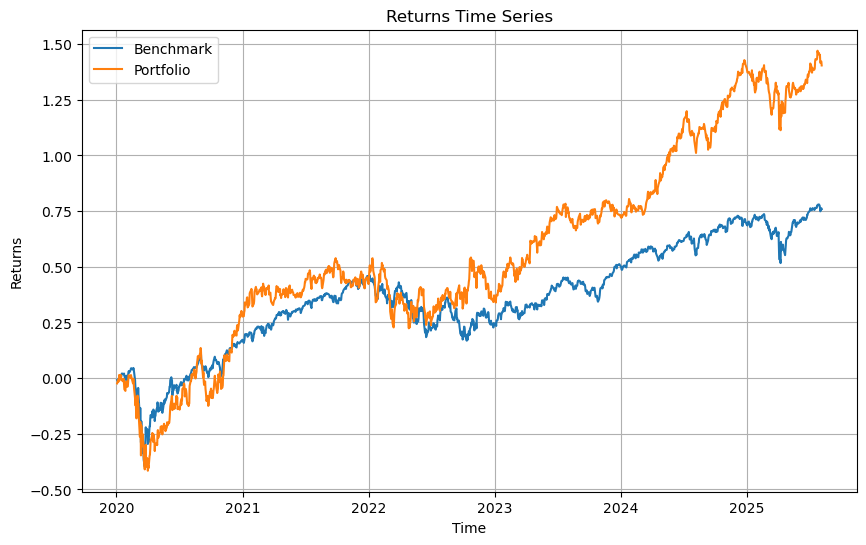

In [31]:
# Create Plot
plt.figure(figsize=(10, 6))
plt.plot(benchmark_returns.cumsum(), label='Benchmark', alpha=1)
plt.plot(portfolio_returns.cumsum(), label='Portfolio', alpha=1)

# Config
plt.title('Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.grid()

# Show
plt.show() 

In [32]:
# Calculate the Mean Returns
portfolio_total_returns = portfolio_returns.cumsum().iloc[-1]
benchmark_total_returns = benchmark_returns.cumsum().iloc[-1]

print(portfolio_total_returns)
print(benchmark_total_returns)

1.4040000000000004
0.7585608365944346


In [33]:
# Calculate the Excess Returns
excess_returns = portfolio_total_returns - benchmark_total_returns

excess_returns

0.6454391634055657

In [34]:
# Sectors List
sectors_list = [
    "Technology",
    "Health",
    "Financials",
    "Consumer",
    "Energy",
    "Industrials",
    "Real_Estate"
]

In [35]:
stock_returns_df.columns = sectors_list
sector_returns_df.columns = sectors_list

In [36]:
portfolio_weights.index = sectors_list
norm_bench_weights.index = sectors_list

The calculations of the effects in the Brinson-Fachler Model can be reviewed in the first section of this module's PDF. The mathematical derivations and explanations are provided there.

In [37]:
# Create a Comparison DF
comparison_df = pd.DataFrame(index = sectors_list)
comparison_df['portfolio_weights'] = portfolio_weights
comparison_df['benchmark_weights'] = norm_bench_weights
comparison_df['stocks_returns'] = stock_returns_df.cumsum().iloc[-1]
comparison_df['sector_returns'] = sector_returns_df.cumsum().iloc[-1]
comparison_df['portfolio_returns'] = comparison_df['portfolio_weights'] * comparison_df['stocks_returns']
comparison_df['benchmark_returns'] = comparison_df['benchmark_weights'] * comparison_df['sector_returns']

# The Alphas (Portfolio - Benchmark)
comparison_df['alphas'] = comparison_df['stocks_returns'] - comparison_df['sector_returns']
comparison_df['weights_diff'] = comparison_df['portfolio_weights'] - comparison_df['benchmark_weights']

comparison_df

,portfolio_weights,benchmark_weights,stocks_returns,sector_returns,portfolio_returns,benchmark_returns,alphas,weights_diff
Technology,0.790813,0.395494,1.027560,1.073100,0.812608,0.424405,-0.045540,0.395319
Health,0.212606,0.120150,0.311959,0.348558,0.066324,0.041879,-0.036599,0.092456
Financials,0.704044,0.178974,0.885814,0.614184,0.623652,0.109923,0.271630,0.525070
Consumer,0.155564,0.132666,0.811978,0.592837,0.126315,0.078649,0.219141,0.022898
Energy,0.175161,0.037547,0.674398,0.581131,0.118128,0.021820,0.093268,0.137614
Industrials,-0.589015,0.108886,0.322562,0.686179,-0.189994,0.074715,-0.363617,-0.697901
Real_Estate,-0.449174,0.026283,0.340700,0.272787,-0.153033,0.007170,0.067913,-0.475456


In [38]:
# Check the sum
comparison_df.sum()

portfolio_weights    1.000000e+00
benchmark_weights    1.000000e+00
stocks_returns       4.374971e+00
sector_returns       4.168775e+00
portfolio_returns    1.404000e+00
benchmark_returns    7.585608e-01
alphas               2.061958e-01
weights_diff        -1.665335e-16
dtype: float64

In [39]:
# Calculate the Brinson-Fachler Allocation Effect
allocation_effect = comparison_df['weights_diff'] * (comparison_df['sector_returns'] - comparison_df['benchmark_returns'].sum())
allocation_effect.name = 'allocation_effect'

allocation_effect

Technology     0.124343
Health        -0.037907
Financials    -0.075808
Consumer      -0.003795
Energy        -0.024417
Industrials    0.050515
Real_Estate    0.230964
Name: allocation_effect, dtype: float64

In [40]:
# Calculate the Brinson-Fachler Selection Effect
selection_effect = comparison_df['benchmark_weights'] * comparison_df['alphas']
selection_effect.name = 'selection_effect'

selection_effect

Technology    -0.018011
Health        -0.004397
Financials     0.048615
Consumer       0.029073
Energy         0.003502
Industrials   -0.039593
Real_Estate    0.001785
Name: selection_effect, dtype: float64

In [41]:
# Calculate the Brinson-Fachler Intersection Effect
interaction_effect = comparison_df['weights_diff'] * comparison_df['alphas']
interaction_effect.name = 'interaction_effect'

interaction_effect

Technology    -0.018003
Health        -0.003384
Financials     0.142625
Consumer       0.005018
Energy         0.012835
Industrials    0.253769
Real_Estate   -0.032290
Name: interaction_effect, dtype: float64

In [42]:
# Calculate the Total Effect
bf_total_attribution = (
        allocation_effect + 
        selection_effect +
        interaction_effect
)

bf_total_attribution.name = 'bf_total_attribution'

bf_total_attribution

Technology     0.088330
Health        -0.045688
Financials     0.115431
Consumer       0.030296
Energy        -0.008080
Industrials    0.264691
Real_Estate    0.200460
Name: bf_total_attribution, dtype: float64

In [43]:
# Show
brinson_fachler_df = pd.DataFrame({
    'allocation': allocation_effect,
    'selection': selection_effect,
    'interaction': interaction_effect,
    'total': bf_total_attribution
})

brinson_fachler_df

,allocation,selection,interaction,total
Technology,0.124343,-0.018011,-0.018003,0.088330
Health,-0.037907,-0.004397,-0.003384,-0.045688
Financials,-0.075808,0.048615,0.142625,0.115431
Consumer,-0.003795,0.029073,0.005018,0.030296
Energy,-0.024417,0.003502,0.012835,-0.008080
Industrials,0.050515,-0.039593,0.253769,0.264691
Real_Estate,0.230964,0.001785,-0.032290,0.200460


In [44]:
brinson_fachler_df.sum().round(6)

allocation     0.263896
selection      0.020973
interaction    0.360570
total          0.645439
dtype: float64

In [45]:
# Divide the DataFrame by the Excess Return
norm_brinson_fachler_df = (brinson_fachler_df/brinson_fachler_df['total'].sum()) * 100

norm_brinson_fachler_df

,allocation,selection,interaction,total
Technology,19.264882,-2.790460,-2.789220,13.685202
Health,-5.873079,-0.681298,-0.524260,-7.078637
Financials,-11.745185,7.532017,22.097308,17.884139
Consumer,-0.587942,4.504306,0.777452,4.693816
Energy,-3.782998,0.542565,1.988569,-1.251864
Industrials,7.826461,-6.134255,39.317250,41.009456
Real_Estate,35.784078,0.276547,-5.002738,31.057888


In [46]:
norm_brinson_fachler_df.sum().round(2)

allocation      40.89
selection        3.25
interaction     55.86
total          100.00
dtype: float64

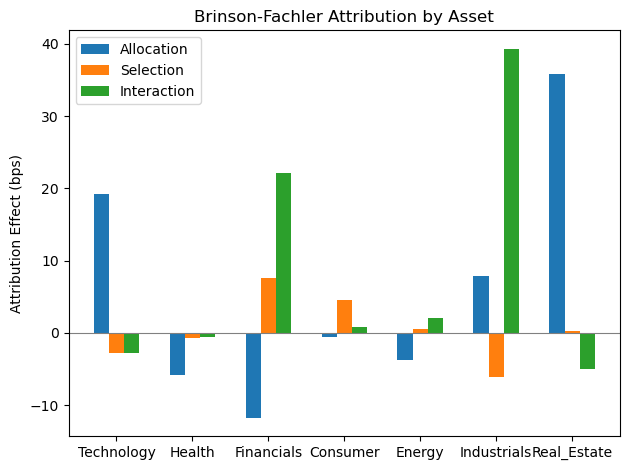

In [47]:
# Plotting individual attribution effects per asset
fig, ax = plt.subplots()

bar_width = 0.2
x = np.arange(len(norm_brinson_fachler_df))

# Plot each component
ax.bar(x - bar_width, norm_brinson_fachler_df["allocation"], width=bar_width, label="Allocation")
ax.bar(x, norm_brinson_fachler_df["selection"], width=bar_width, label="Selection")
ax.bar(x + bar_width, norm_brinson_fachler_df["interaction"], width=bar_width, label="Interaction")

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(norm_brinson_fachler_df.index)
ax.set_ylabel("Attribution Effect (bps)")
ax.set_title("Brinson-Fachler Attribution by Asset")
ax.legend()
ax.axhline(0, color="gray", linewidth=0.8)

plt.tight_layout()
plt.show()

### Brinson-Hood-Beebower Model ###

To understand the differences between the BHB Model and the Brinson-Fachler Model, the reader can refer to Section 2 of this module’s PDF. There, you will find a detailed explanation of why the BHB Model is also used.

In [48]:
# Let us define the portfolios

# Quadrant IV Portfolio
pure_active_portfolio = stock_returns_df @ portfolio_weights
pure_active_portfolio.name = 'pure_active_portfolio_returns'

pure_active_portfolio 

2020-01-03   -0.023687
2020-01-06    0.015918
2020-01-07   -0.008254
2020-01-08    0.005335
2020-01-09    0.024866
                ...   
2025-07-30   -0.004297
2025-07-31    0.001217
2025-08-01   -0.035026
2025-08-04    0.005934
2025-08-05   -0.017827
Name: pure_active_portfolio_returns, Length: 1404, dtype: float64

In [49]:
# Quadrant I Portfolio
pure_pasive_portfolio = sector_returns_df @ norm_bench_weights
pure_pasive_portfolio.name = 'pure_pasive_portfolio_returns'

pure_pasive_portfolio

2020-01-03   -0.008698
2020-01-06    0.002276
2020-01-07   -0.002397
2020-01-08    0.006430
2020-01-09    0.007505
                ...   
2025-07-30   -0.001960
2025-07-31   -0.009165
2025-08-01   -0.016988
2025-08-04    0.014115
2025-08-05   -0.004390
Name: pure_pasive_portfolio_returns, Length: 1404, dtype: float64

In [50]:
# Quadrant II Portfolio (Active Allocation Passive Selection)
aaps_portfolio = sector_returns_df @ portfolio_weights
aaps_portfolio.name = 'aaps_portfolio_returns'

aaps_portfolio

2020-01-03   -0.022311
2020-01-06    0.004203
2020-01-07    0.000070
2020-01-08    0.007724
2020-01-09    0.013913
                ...   
2025-07-30    0.005793
2025-07-31   -0.010545
2025-08-01   -0.026194
2025-08-04    0.018109
2025-08-05   -0.010114
Name: aaps_portfolio_returns, Length: 1404, dtype: float64

In [51]:
# Quadrant III Portfolio (Passive Allocation Active Selection)
paas_portfolio = stock_returns_df @ norm_bench_weights
paas_portfolio.name = 'paas_portfolio_returns'

paas_portfolio

2020-01-03   -0.010045
2020-01-06    0.004054
2020-01-07   -0.005230
2020-01-08    0.007403
2020-01-09    0.009687
                ...   
2025-07-30   -0.003596
2025-07-31   -0.006547
2025-08-01   -0.026202
2025-08-04    0.006198
2025-08-05   -0.000652
Name: paas_portfolio_returns, Length: 1404, dtype: float64

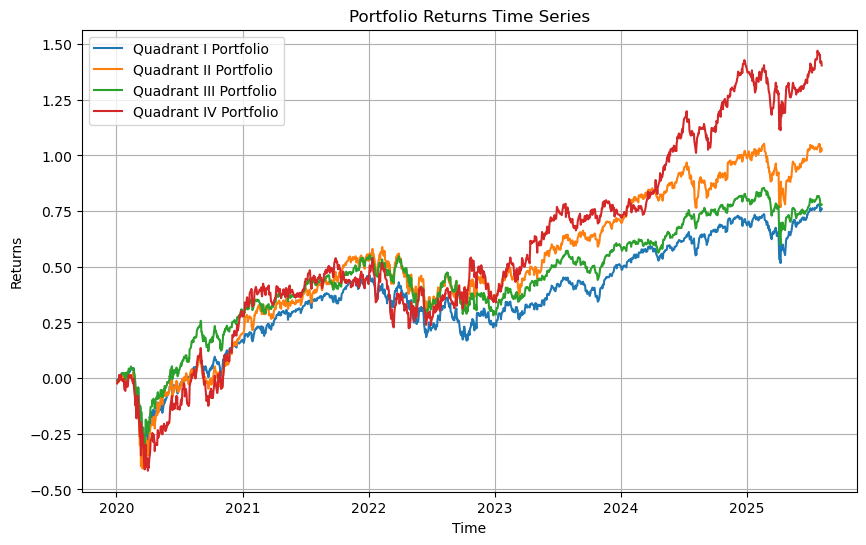

In [52]:
# Create Plot
plt.figure(figsize=(10, 6))
plt.plot(pure_pasive_portfolio.cumsum(), label='Quadrant I Portfolio', alpha=1)
plt.plot(aaps_portfolio.cumsum(), label='Quadrant II Portfolio', alpha=1)
plt.plot(paas_portfolio.cumsum(), label='Quadrant III Portfolio', alpha=1)
plt.plot(pure_active_portfolio.cumsum(), label='Quadrant IV Portfolio', alpha=1)

# Config
plt.title('Portfolio Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.grid()

# Show
plt.show() 

In [53]:
# Now calculate the cumulative returns
quadrant_1_return = pure_pasive_portfolio.cumsum().iloc[-1]
quadrant_2_return = aaps_portfolio.cumsum().iloc[-1]
quadrant_3_return = paas_portfolio.cumsum().iloc[-1]
quadrant_4_return = pure_active_portfolio.cumsum().iloc[-1]

print(f'Quadrant 1 Return: {quadrant_1_return}')
print(f'Quadrant 2 Return: {quadrant_2_return}')
print(f'Quadrant 3 Return: {quadrant_3_return}')
print(f'Quadrant 4 Return: {quadrant_4_return}')

Quadrant 1 Return: 0.7585608365944346
Quadrant 2 Return: 1.0224564929897866
Quadrant 3 Return: 0.7795338805313181
Quadrant 4 Return: 1.4040000000000004


In [54]:
# The Excess Returns (we calculated it previously)
excess_returns

0.6454391634055657

In [55]:
# Market Timing Effect:
market_timing_effect = quadrant_2_return - quadrant_1_return

print(f'Market Timing Effect: {market_timing_effect}')

Market Timing Effect: 0.26389565639535195


In [56]:
# Security Selection Effect:
security_selection_effect = quadrant_3_return - quadrant_1_return

print(f'Security Selection Effect: {security_selection_effect}')

Security Selection Effect: 0.020973043936883484


In [57]:
# Other Effects:
other_effects = quadrant_4_return + quadrant_1_return - quadrant_2_return - quadrant_3_return

print(f'Other Effects: {other_effects}')

Other Effects: 0.3605704630733304


In [58]:
# Total Effect (must be equal to the excess returns)
total_effect = market_timing_effect + security_selection_effect + other_effects

print(f'Total Effect: {total_effect}')

Total Effect: 0.6454391634055658


In [59]:
# Check that both models provide the same results
brinson_fachler_df.sum()

allocation     0.263896
selection      0.020973
interaction    0.360570
total          0.645439
dtype: float64